**Import the data we already cleaned**

In [35]:
import pandas as pd
df = pd.read_csv('D:/Learning/BDM 500/Project.csv')
df.head()

,Unnamed: 0,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [36]:
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,Cash,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    1000 non-null   object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [39]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1000 non-null   int64         
 1   date                1000 non-null   datetime64[ns]
 2   item_name           1000 non-null   object        
 3   item_type           1000 non-null   object        
 4   item_price          1000 non-null   int64         
 5   quantity            1000 non-null   int64         
 6   transaction_amount  1000 non-null   int64         
 7   transaction_type    1000 non-null   object        
 8   received_by         1000 non-null   object        
 9   time_of_sale        1000 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 78.2+ KB


In [23]:
import scipy
from scipy.stats import skew
df_numerical= df[['item_price', 'quantity', 'transaction_amount']]
df_skew = skew(df_numerical)
print("Skewness", df_skew)

Skewness [ 0.62406658 -0.05122249  1.05106356]


#### Interpretation
- item_price has a skewness of 0.624, since it is positive -> the distribution has a longer tail on the right side. It is slightly right-skewed but close to symmetric
- quantity has a skewness of -0.051, which is a slight negative skewness -> Distribution is quite symmetric, as the value is very close to 0
- transaction_amount has a skewness of 1.051, which is  positive -> Distribution is moderately reight-skewed, having a longer tail on the right side

### Construct and interpret histograms and plots for normality

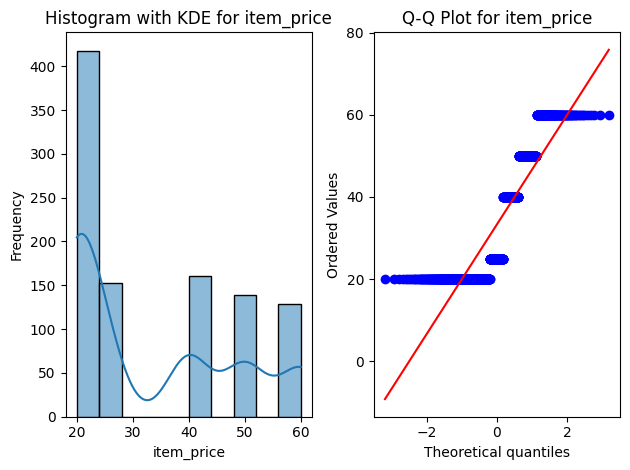

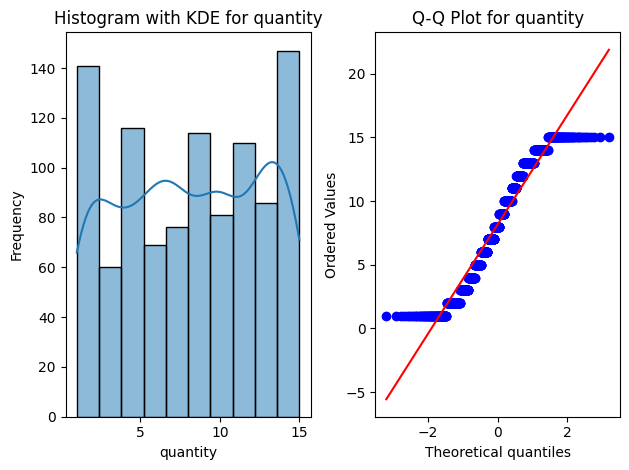

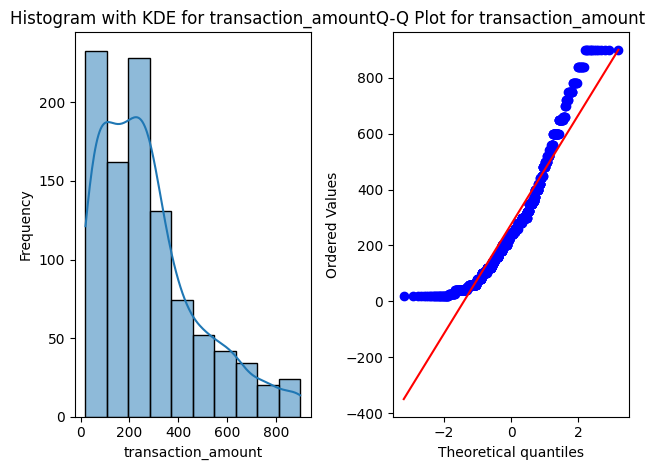

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot


for col in df_numerical.columns:
    plt.figure()
    plt.subplot(1, 2, 1)
    sns.histplot(df_numerical[col], kde=True, bins=10)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    probplot(df_numerical[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.tight_layout()
    plt.show()


- item_price: the distribution on histogram is right_skewed, as indicated by a peak on the left (around 20) and a tail stretching towards higher values (60+). The KDE line shows that item_price has non-normal distribution with multiples peaks. Based on the QQ plot, item_price doesn't have normal distribution as it has right skewness
- quantity: For histogram, the distribution is quite uniform, with no clear peak or bellshape structure. The KDA line doesn't follow a normal bell curve. Based on QQ plot, the points generally align with the diagonal red line but show some deviation. The data is roughly symmetric and follows a normal distribution. Quantity is more symmetric than item_price but lacks a clear normal distribution because of its uniform nature.
- transaction_amount: Using the histogram, the distribution iss strongly right-skewed, with a peak at lower values and a long tail towards higher values. The KDE line shows the skewness and lack of symmetry. Based on the QQ plot, the points deviate significantly from the diagonal red line, particularly at the upper tail (right skew). It means transaction_amount


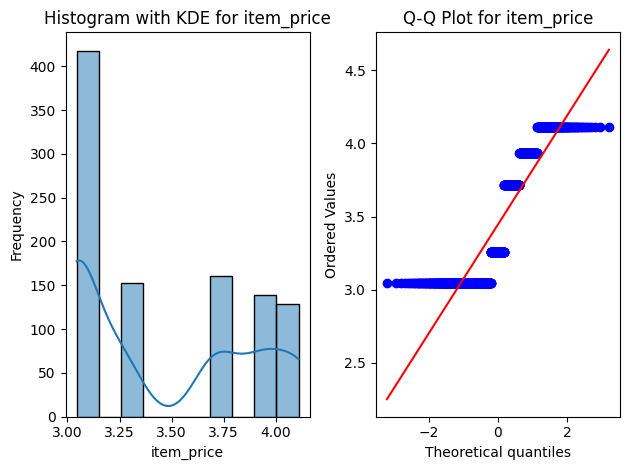

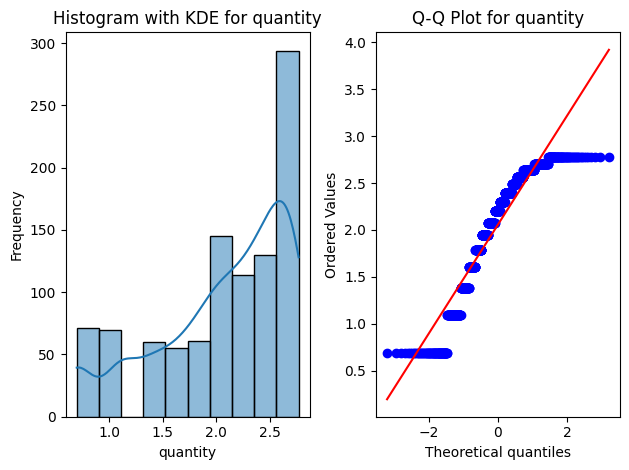

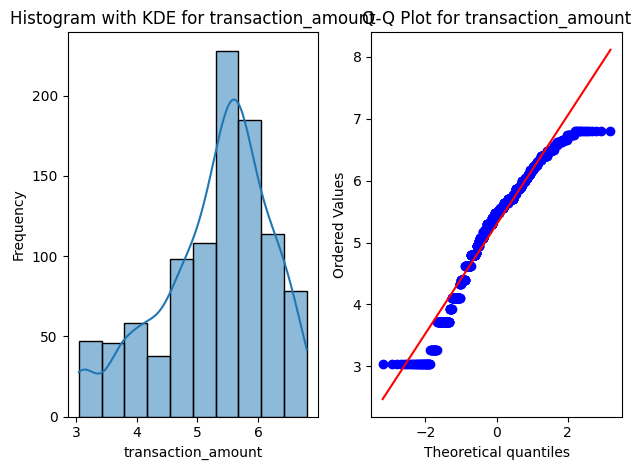

In [46]:
import numpy as np
log_data = np.log1p(df_numerical)  
for col in log_data.columns:
    plt.figure()
    plt.subplot(1, 2, 1)
    sns.histplot(log_data[col], kde=True, bins=10)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    probplot(log_data[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
    plt.tight_layout()
    plt.show()
